In [31]:
%run "setup.py"
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from section import Section
from cba_result import CbaResult

In [1]:
file = '../data/2019 RoADS CBA Version 1.00 2019-09-25_EXAMPLE.xlsm'
file = '../data/example_data.xlsm'
sheet = "RoADS Sections Data and Results"

example_inputs = pd.read_excel(file, sheet_name=sheet, header=29, usecols=list(range(1,54))).dropna(subset=['RoadSectionID'])
example_outputs = pd.read_excel(file, sheet_name=sheet, header=29, usecols=list(range(54,148))).dropna(subset=['NPV'])
example_output_calcs = pd.read_excel(file, sheet_name=sheet, header=29, usecols=list(range(148, 170)))
example_outputs['RoadSectionID'] = example_inputs['RoadSectionID']
#example_output_calcs['RoadSectionID'] = example_inputs['RoadSectionID']

In [30]:



def default_int(a_string: str):
    return 0 if a_string == "" else int(a_string)

def default_float(a_string: str, a_float=0.0):
    return 0.0 if a_string == "" else float(a_string)

def floatify(x):
    if isinstance(x, float) or isinstance(x, int):
        return float(x)
    if isinstance(x, str):
        return x.rstrip('+')

def save_example_data(in_row, out_row, calc_row):
    def get_array(key, num):
        return [float(out_row[f'{key}{i}']) for i in range(1,num+1)]
    
    in_row = in_row.fillna('')
    
    in_data = { 'orma_way_id': in_row['RoadSectionID'], 
                'road_number' : in_row['RoadNumber'], 
                'road_name' : in_row['RoadName'], 
                'road_start' : in_row['RoadStart'], 
                'road_end' : in_row['RoadEnd'],
                'province' : in_row['Province'],
                'district' : in_row['District'],
                'commune' : in_row['Commune'], 
                'management' : default_int(in_row['Management']), 
                'start_km' : default_float(in_row['Start_Km']), 
                'end_km' : default_float(in_row['End_Km']), 
                'length' : in_row['Length'], 
                'lanes' : default_int(in_row['Lanes']), 
                'width' : floatify(in_row['Width']), 
                'road_class' : in_row['RoadClass'], 
                'terrain' : in_row['Terrain'], 
                'temperature' : in_row['Temperature'], 
                'moisture' : in_row['Moisture'], 
                'surface_type' : in_row['SurfaceType'], 
                'condition_class' : in_row['ConditionClass'], 
                'roughness' : default_float(in_row['Roughness']), 
                'traffic_level' : in_row['TrafficLevel'], 
                'traffic_growth' : in_row['TrafficGrowth'],  
                'pavement_age' : default_int(in_row['PavementAge']), 
                'aadt_motorcyle' : default_int(in_row['AADT_Motorcycle']), 
                'aadt_carsmall' : default_int(in_row['AADT_CarSmall']), 
                'aadt_carmedium' : default_int(in_row['AADT_CarMediun']), 
                'aadt_delivery' : default_int(in_row['AADT_Delivery']), 
                'aadt_4wheel' : default_int(in_row['AADT_4Wheel']), 
                'aadt_smalltruck' : default_int(in_row['AADT_SmallTruck']), 
                'aadt_mediumtruck' : default_int(in_row['AADT_MediumTruck']), 
                'aadt_largetruck' : default_int(in_row['AADT_MediumTruck']), 
                'aadt_articulatedtruck' : default_int(in_row['AADT_ArticulatedTruck']), 
                'aadt_smallbus' : default_int(in_row['AADT_SmallBus']), 
                'aadt_mediumbus' : default_int(in_row['AADT_MediumBus']), 
                'aadt_largebus' : default_int(in_row['AADT_LargeBus']), 
                'aadt_total' : default_int(in_row['AADT_Total'])
              
            }  
    s = Section(in_data)
    
    out_data = {
        'orma_way_id': in_row['RoadSectionID'], 
        'work_class': out_row['WorkClass'], 
        'work_type': out_row['WorkType'], 
        'work_name': out_row['WorkName'], 
        'work_cost': out_row['WorkCost'], 
        'work_cost_km': out_row['WorkCost_Km'], 
        'work_year': out_row['WorkYear'], 
        'npv': out_row['NPV'], 
        'npv_km': out_row['NPV_Km'], 
        'npv_cost': out_row['NPV_Cost'], 
        'eirr': out_row['EIRR'], 
        'aadt': get_array('AADT', 10), 
        'truck_percent': out_row['Y1TruckPercent'], 
        'vehicle_utilization': out_row['Y1VehUtil'],
        'esa_loading': out_row['Y1ESA'], 
        'iri_projection': get_array('IRIp', 10), 
        'iri_base': get_array('IRIb', 10), 
        'con_projection': get_array('CONp', 10), 
        'con_base': get_array('CONb', 10), 
        'financial_recurrent_cost': get_array('REC', 10), 
        'net_benefits': get_array('NET', 20), 
    }
    r = CbaResult(out_data)
    ident = s['orma_way_id']
    
    with open(f"../tests/example_data/section_{ident}.json", 'w') as f:
        f.write(json.dumps(s.to_primitive(), indent=2))
    with open(f"../tests/example_data/section_{ident}.output.json", 'w') as f:
        f.write(json.dumps(r.to_primitive(), indent=2))


def save_to_example_data(i):
    if i % 100 == 0: 
        print('.')
    in_row, out_row, calc_row = example_inputs.loc[i], example_outputs.loc[i], example_output_calcs.loc[i]
    save_example_data(in_row, out_row, calc_row)
    
# example_inputs.shape
[save_to_example_data(i) for i in range(len(example_inputs))]
None

.


TypeError: Object of type StringType is not JSON serializable

In [27]:
import cba as cba
from cba_result import CbaResult

example_data_dir = abspath(os.path.join(os.getcwd(), '..', 'tests', 'example_data'))
cba_model = cba.CostBenefitAnalysisModel()


In [29]:
import glob, re
from os.path import join, abspath
from roads_cba_py.utils import comp

files = [f for f in glob.glob(join(example_data_dir, "section_*.json")) if "output" not in f]
idents = [re.match(".*section_(.*).json", f)[1] for f in files]
#idents = ["637227_299"]
arr = []

for ident in idents:
    print(f"COMPARING {ident}")
    input = Section.from_file(join(example_data_dir, f"section_{ident}.json"))
    expected_output = CbaResult.from_file(join(example_data_dir, f"section_{ident}.output.json"))
    actual_output = cba_model.compute_cba_for_section(input)
    comparison = expected_output.compare(actual_output)
    comparison['road_section_id'] = ident
    arr.append(comparison)



COMPARING 636587_300
COMPARING 637057_304
COMPARING 638634_298
COMPARING 638635_298
COMPARING 638453_298
COMPARING 637056_304
COMPARING 637878_303
COMPARING 637879_303
COMPARING 636861_295
COMPARING 637227_299
COMPARING 636860_295
COMPARING 637226_299
COMPARING 637345_298
COMPARING 638792_301
COMPARING 615080_302
COMPARING 638793_301
COMPARING 637611_298
COMPARING 637569_305
COMPARING 637568_305
COMPARING 637610_298
COMPARING 637970_303
COMPARING 637971_303
COMPARING 637831_303
COMPARING 637830_303
COMPARING 636632_300
COMPARING 636633_300
COMPARING 638825_301
COMPARING 636367_300
COMPARING 637841_304
COMPARING 638824_301
COMPARING 637939_303
COMPARING 637938_303
COMPARING 637008_299
COMPARING 637009_299
COMPARING 636645_300
COMPARING 638852_301
COMPARING 637273_298
COMPARING 637272_298
COMPARING 638853_301
COMPARING 637069_304
COMPARING 637068_304
COMPARING 636383_300
COMPARING 637557_305
COMPARING 637556_305
COMPARING 636219_300
COMPARING 636218_300
COMPARING 637161_304
COMPARING 637

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
df = pd.DataFrame(arr)

In [46]:
df.npv

0       0
1       0
2       0
3       0
4       0
       ..
1027    0
1028    0
1029    0
1030    0
1031    0
Name: npv, Length: 1032, dtype: int64

(0.5918660924062054, (1032, 94))

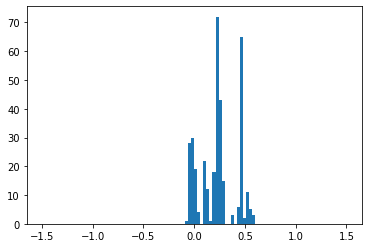

In [51]:
plt.hist(df.eirr, range=[-1.5, 1.5], bins=100)
df.eirr.max(), df.shape

In [55]:
float_cols = ['aadt_1', 'aadt_10', 'aadt_2', 'aadt_3', 'aadt_4', 'aadt_5', 'aadt_6',
       'aadt_7', 'aadt_8', 'aadt_9', 'con_base_1', 'con_base_10', 'con_base_2',
       'con_base_3', 'con_base_4', 'con_base_5', 'con_base_6', 'con_base_7',
       'con_base_8', 'con_base_9', 'con_projection_1', 'con_projection_10',
       'con_projection_2', 'con_projection_3', 'con_projection_4',
       'con_projection_5', 'con_projection_6', 'con_projection_7',
       'con_projection_8', 'con_projection_9', 'eirr', 'esa_loading',
       'financial_recurrent_cost_1', 'financial_recurrent_cost_10',
       'financial_recurrent_cost_2', 'financial_recurrent_cost_3',
       'financial_recurrent_cost_4', 'financial_recurrent_cost_5',
       'financial_recurrent_cost_6', 'financial_recurrent_cost_7',
       'financial_recurrent_cost_8', 'financial_recurrent_cost_9',
       'iri_base_1', 'iri_base_10', 'iri_base_2', 'iri_base_3', 'iri_base_4',
       'iri_base_5', 'iri_base_6', 'iri_base_7', 'iri_base_8', 'iri_base_9',
       'iri_projection_1', 'iri_projection_10', 'iri_projection_2',
       'iri_projection_3', 'iri_projection_4', 'iri_projection_5',
       'iri_projection_6', 'iri_projection_7', 'iri_projection_8',
       'iri_projection_9', 'net_benefits_1', 'net_benefits_10',
       'net_benefits_11', 'net_benefits_12', 'net_benefits_13',
       'net_benefits_14', 'net_benefits_15', 'net_benefits_16',
       'net_benefits_17', 'net_benefits_18', 'net_benefits_19',
       'net_benefits_2', 'net_benefits_20', 'net_benefits_3', 'net_benefits_4',
       'net_benefits_5', 'net_benefits_6', 'net_benefits_7', 'net_benefits_8',
       'net_benefits_9', 'npv', 'npv_cost', 'npv_km', 'truck_percent',
       'vehicle_utilization', 'work_class', 'work_cost', 'work_cost_km',
       'work_name', 'work_type', 'work_year', 'road_section_id']
df[float_cols].sum()

aadt_1                                                                         0
aadt_10                                                                        0
aadt_2                                                                         0
aadt_3                                                                         0
aadt_4                                                                         0
aadt_5                                                                         0
aadt_6                                                                         0
aadt_7                                                                         0
aadt_8                                                                         0
aadt_9                                                                         0
con_base_1                                                                     0
con_base_10                                                                    0
con_base_2                  